# Homework 2 - How do Taxis move in NYC? 

### Libraries 


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import random

%matplotlib inline
import matplotlib.pyplot as plt

import functions

import datetime
import time

from scipy.stats import chi2_contingency, ttest_ind ,chisquare, kruskal, pearsonr

In [9]:
from importlib import reload
reload(functions)

<module 'functions' from 'C:\\Users\\elena\\Documents\\DataScience\\ADM_18\\ADMSecondH_v5\\functions.py'>

In [10]:
# directory path for csv files (dataset from Jan to Jun 2018)
df_names=['data/yellow_tripdata_2018-01.csv','data/yellow_tripdata_2018-02.csv',
          'data/yellow_tripdata_2018-03.csv','data/yellow_tripdata_2018-04.csv',
         'data/yellow_tripdata_2018-05.csv','data/yellow_tripdata_2018-06.csv']

# months to analize 
months = ['January','February','March','April','May','June']


taxi_zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')

# Excluding borough labeled 'Unknown' from the analysis cause it can be any of the possible boroughs
borough_lst = list(np.unique(taxi_zone_lookup.Borough))
borough_lst.pop()


'Unknown'

## Before starting

A brief summary of our situation. 

The function **stats** shows some informations, inspecting the dataset for every month (''mese'')


In [5]:
#### "SHORT" ANALYSIS FUNCTION: SHOWS THE MAIN INFORMATION ABOUT THE CSV FILES
functions.stats(df_names)

mese 1
	payment_types     : [1: 6105871] [2: 2598947] [3: 43204] [4: 11852] [5: 0] [6: 0]
	total_amount == 0 : 1066
	fare_amount == 0  : 2238
	trip_distance == 0: 55376
	fare_amount == 0 and total_amount == 0 --> 1066
	fare_amount == 0 or total_amount == 0 --> 2238
	both year and month different --> 342
mese 2
	payment_types     : [1: 5990799] [2: 2446989] [3: 42675] [4: 11613] [5: 0] [6: 0]
	total_amount == 0 : 1138
	fare_amount == 0  : 2152
	trip_distance == 0: 52242
	fare_amount == 0 and total_amount == 0 --> 1138
	fare_amount == 0 or total_amount == 0 --> 2152
	both year and month different --> 706
mese 3
	payment_types     : [1: 6560898] [2: 2804905] [3: 50978] [4: 13595] [5: 0] [6: 0]
	total_amount == 0 : 1291
	fare_amount == 0  : 2554
	trip_distance == 0: 60898
	fare_amount == 0 and total_amount == 0 --> 1291
	fare_amount == 0 or total_amount == 0 --> 2554
	both year and month different --> 1335
mese 4
	payment_types     : [1: 6469399] [2: 2772201] [3: 50960] [4: 12955] [5: 0] [

As we can see, there are several odd values. For example, every month has some attribute values equal to zero. After identifying the columns that have some problematical values, instead of removing them everytime we load the dataset for each question, we decided to make a function that does an initial cleaning of the dataset. 


Therefore, the main goal was to eliminate the rows where the *total_amount* values are equal to 0 or the wrong dates from *tpep_pickup_datetime* attribute. 


We decided to remove these values instead of the others because we think that the total_amount is a better information parameter for an occurred trip. For instance, taximeters can give erroneous values (as fare amount or trip distance equal to zero), but the main reference for a taxi company is the payment.

However, this rough clean is not enough. For each task, we'll need to select the appropriate data. We will specify that step by step.

## Cleaning the data

Creating new csv files with cleaned data and storing them in df_names paths

In [ ]:
# Function used only once to clean all the csv files and to store them into new files which were utilized in the research questions.
functions.make_new_csv(df_names)

We found out that one of the fastest ways to get data is to extract only the columns that we need from all the csv files, passing to the arg *usecols* of the function *read_csv( )* the list of attributes that we need. 

So, now that we have cleaned the whole dataframe, in each point of the homework below we keep only the columns that are needed.

____
# [RQ1] In what period of the year Taxis are used more?

## The daily average of trips for each month


For this task, the only attribute that we need is 'tpep_pickup_datetime'.

We decided to eliminate and exclude from our analysis the 'Unknown' borough - the borough that has ambiguous meaning and therefore couldn't provide us with any additional information for our research.

In [5]:
# list of the daily average trips per each month
daily_average_lst = functions.compute_daily_average(df_names)

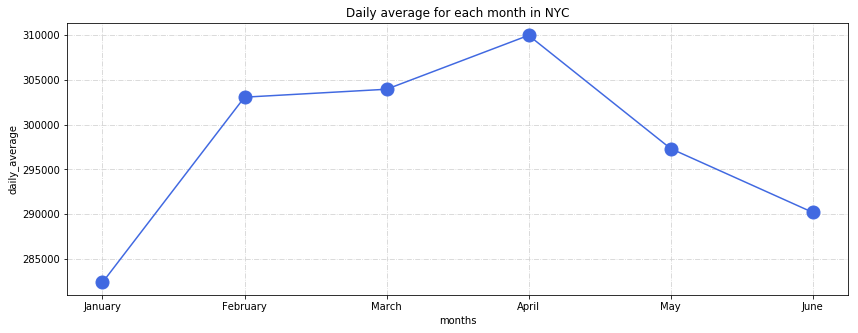

In [6]:
functions.plot_daily_averages(daily_average_lst,months)

Based on the comparison of the average number of daily trips for each month it can be noticed that April has the highest daily average of trips recorded overall New York, while January has the lowest.

As shown in the graph there is an increase in the number of trips from January to April, and then it decreases gradually. The biggest monthly increase of trips was recorded in February.

## The daily trip average for each borough 

We've decided to put the results into a dictionary which has as:
    - key = borough
    - value = list of the daily trip averages for that specific borough for each month

In [11]:
# initialization of dictionary for borough's averages
borough_averages = {}

In [37]:
# dictionary of borough's averages for each month
borough_averages = functions.compute_borough_averages(df_names, taxi_zone_lookup)

In [35]:
for key, lst in borough_averages.items():
    print (key, lst)

Bronx [0, 0, 0, 0, 0, 0]
Brooklyn [6, 9, 8, 9, 7, 7]
Manhattan [299, 322, 291, 307, 284, 287]
Queens [8, 16, 17, 10, 26, 32]
Unknown [7, 7, 5, 5, 3, 5]


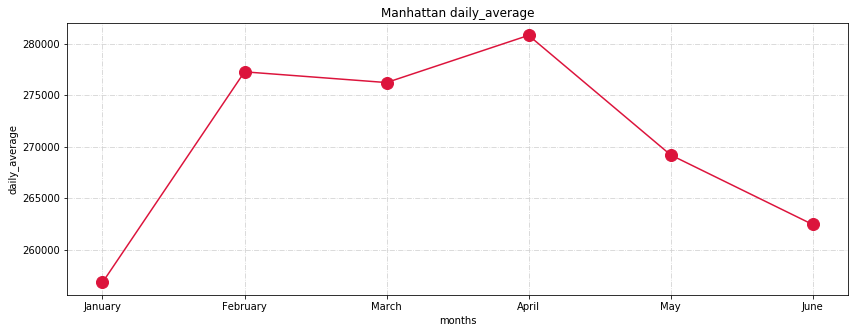

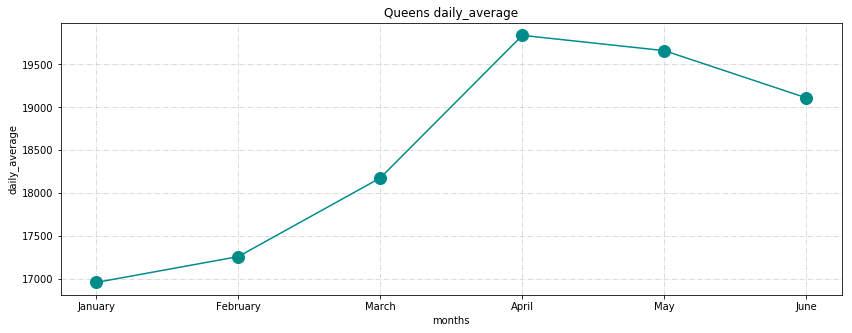

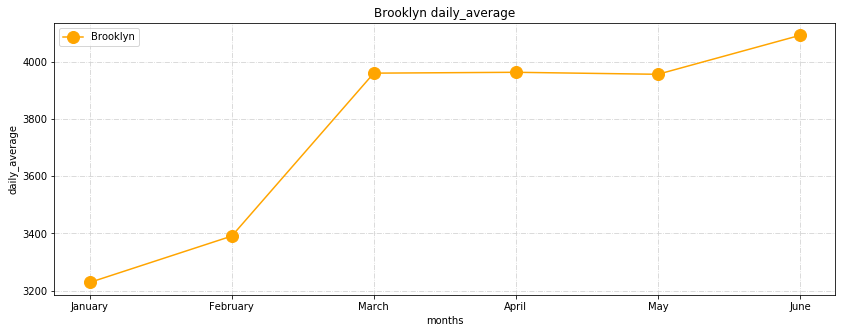

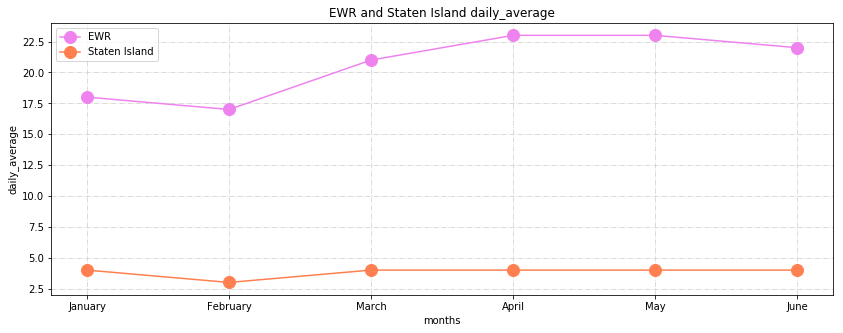

In [14]:
functions.plot_boroug_averages(borough_averages, months)

The daily average of rides is increasing consistently after February until April in Brooklyn, Manhattan, and Queens. About *EWR* and *Staten Island* we should point out that the first one is not a real borough but only an airport area. And for the second case, we noticed the low number of rides which is probably due to the fact that it is not an influence zone for yellow taxis and it is a consequence of a usage of another taxi company.

____
# [RQ2] What are the time slots with more passengers?


For this task, the attributes we need are 'tpep_pickup_datetime' and 'passenger_count'. However, for the second part of the task, we also need 'PULocationID' for merging the data with taxi_zone_lookup.csv.

Before choosing the time slots we have decided that it is easier to make a decision about the time slots if we see the number of passengers for every possible hour during the day.

In [21]:
# the dataframe with two columns: 'tpep_pickup_datetime', 'passenger_count'
df = functions.passengers_NY_all_months(df_names)

<Figure size 432x288 with 0 Axes>

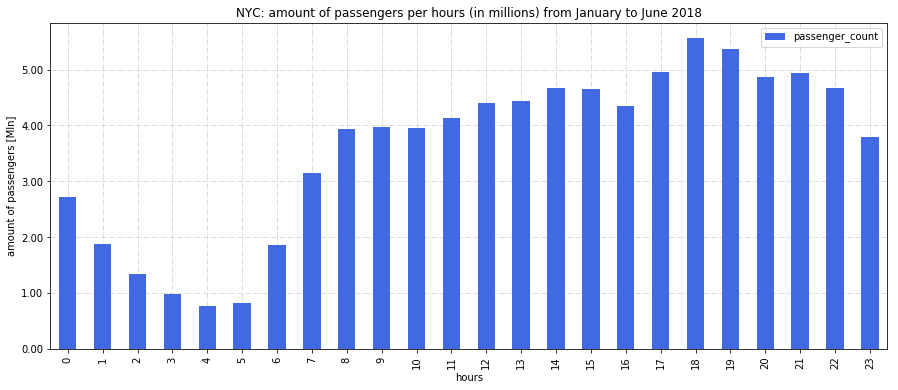

In [11]:
functions.plot_NY_24_hours(df)

Based on the visualization showed above we decided to choose the following time slots:
    1. 01-06 (nightlife)
    2. 06-12 (beginning of work)
    3. 12-17 (work period)
    4. 17-20 (late work period)
    5. 20-01 (early 'nightlife')

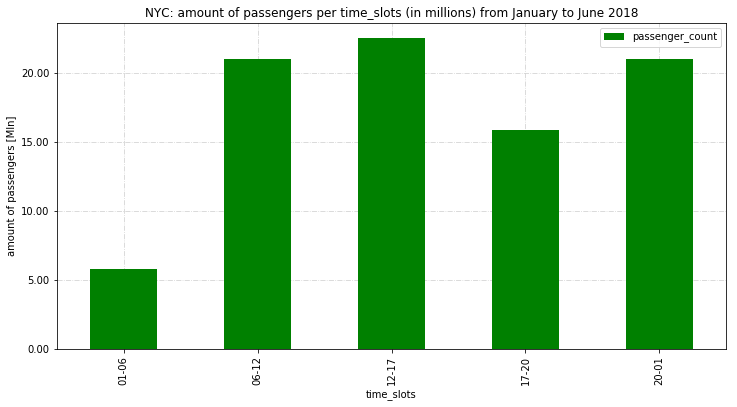

In [12]:
functions.time_slots_and_plot(df,"green")

In the time slots, we defined the highest number of passengers was recorded in the period (12-17h), followed by periods 06-12h and 20-01 who have a similar number of passengers, while the lowest number of passengers was in the 01-06 time slot.

Based on the information about yellow taxis on the website:
    - group ride pickup times for yellow taxis are 06–10h, which explains a higher number of passengers in the 06-12 time slot than for example in 17-20 or 01-06.

### Number of passengers for each borough 

<Figure size 432x288 with 0 Axes>

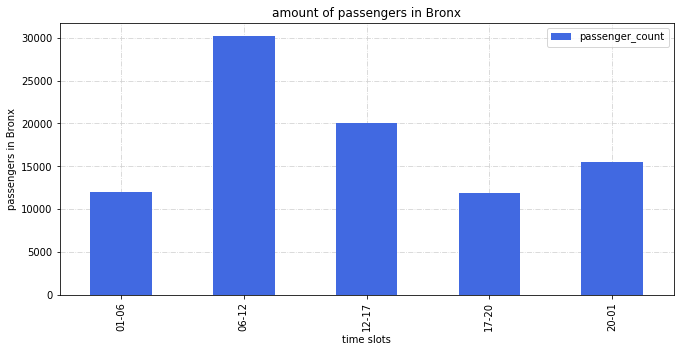

<Figure size 432x288 with 0 Axes>

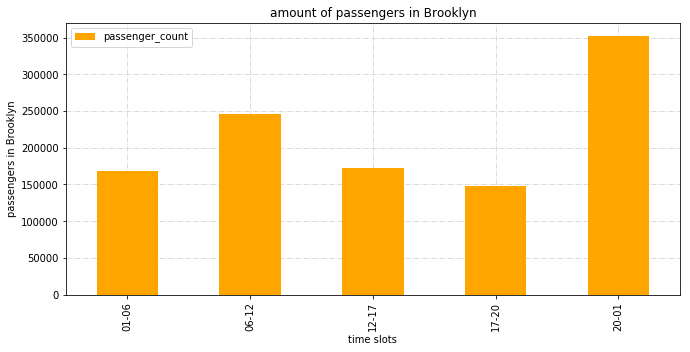

<Figure size 432x288 with 0 Axes>

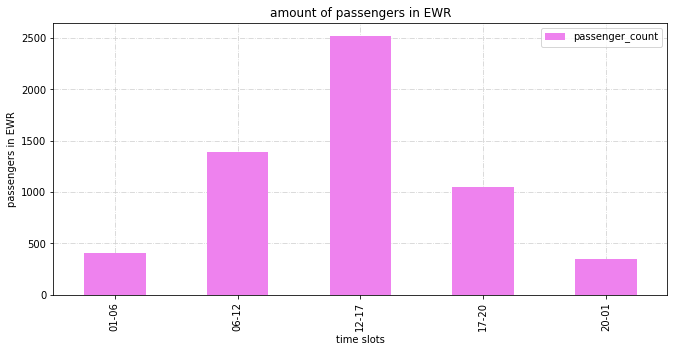

<Figure size 432x288 with 0 Axes>

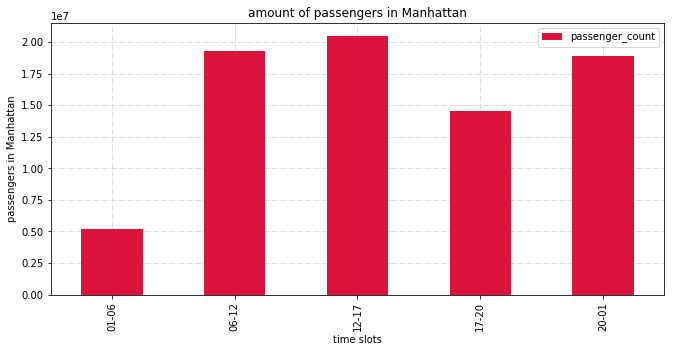

<Figure size 432x288 with 0 Axes>

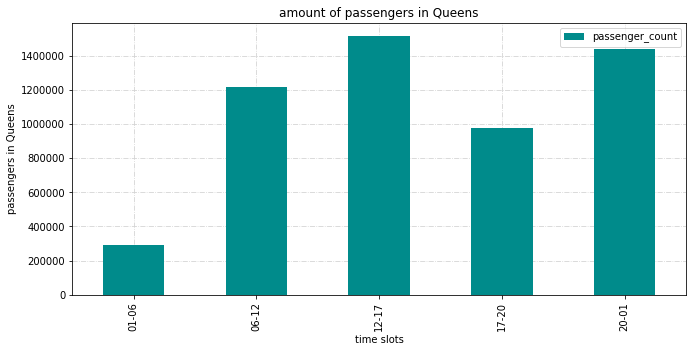

<Figure size 432x288 with 0 Axes>

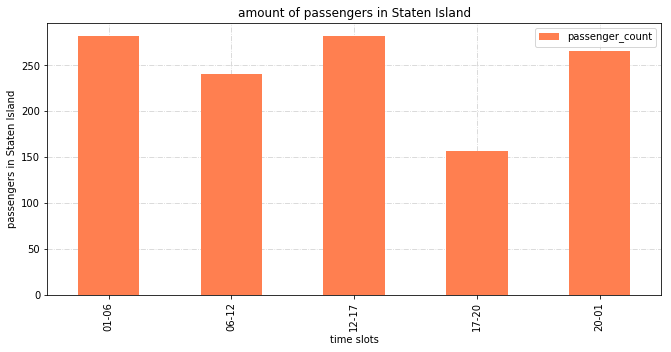

In [13]:
functions.passengers_for_each_borough (df, borough_lst, taxi_zone_lookup)

Different boroughs shows a slight variation on taxi usage during the day. For **Bronx** and **Brooklyn** we can notice an opposite trend for the rush hour for taxi usage. 

____
# [RQ3] Do the all trips last the same?

For this analysis we took under consideration trip duration higher than 120 seconds and lower than 5400 seconds

### a) Performing the analysis for NYC

In [22]:
# the dataframe with columns 'durations' and 'Borough'
# durations is derived from tpep_dropoff_datetime - tpep_pickup_datetime  
df = functions.make_duration_df(df_names,taxi_zone_lookup)

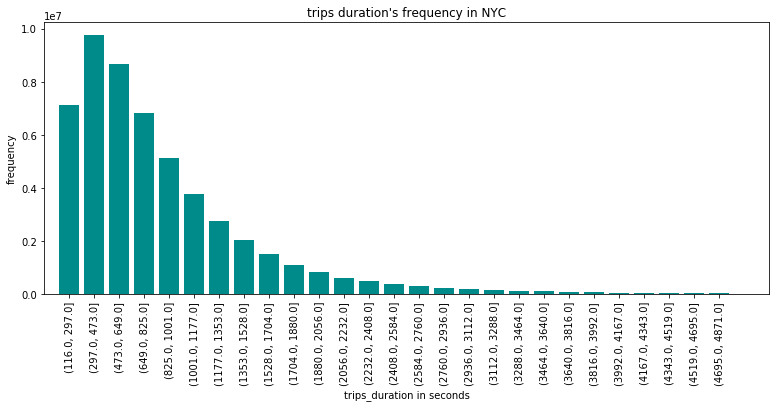

In [23]:
functions.plot_frequencies(df['durations'], 'NYC')

After diving the trip duration into small interval, we noticed that the distribution of trips_duration follows a chi-squared distro. We can see moreover that we have a peak for taxi trips that last around 5 and 8 minutes.

### Performing the analysis for each borough

Performing the analysis for each borough separately (in the plots below), we can notice that almost all the boroughts follow also the chi-squared distro, except for EWR and Staten Island. This is due to the fact that our information about EWR and Staten Island are not as exhaustive as for the others, and that EWR and Staten Island are zones of others taxi companies.

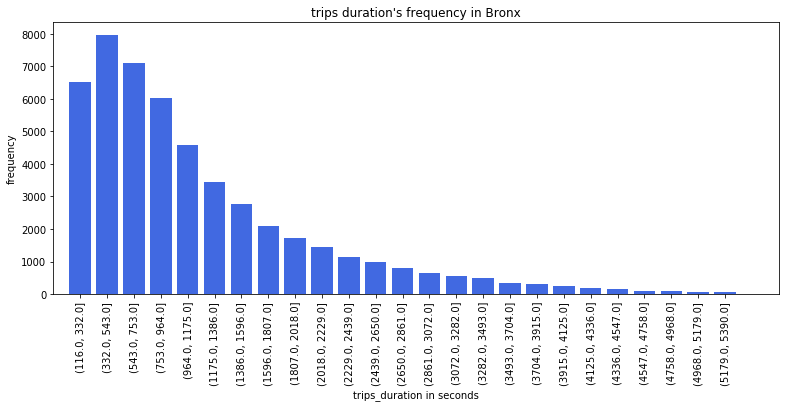

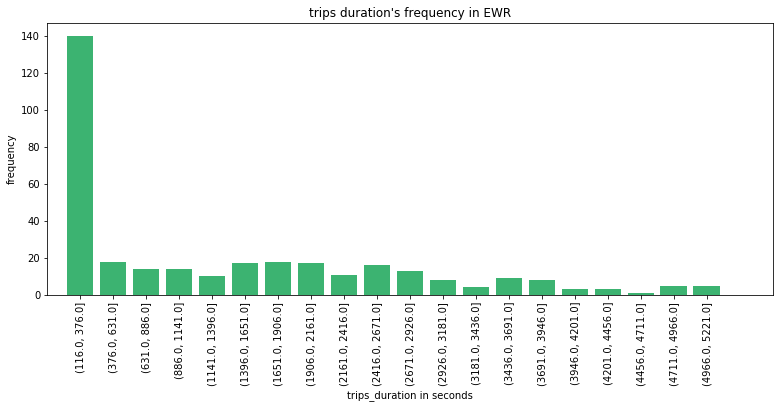

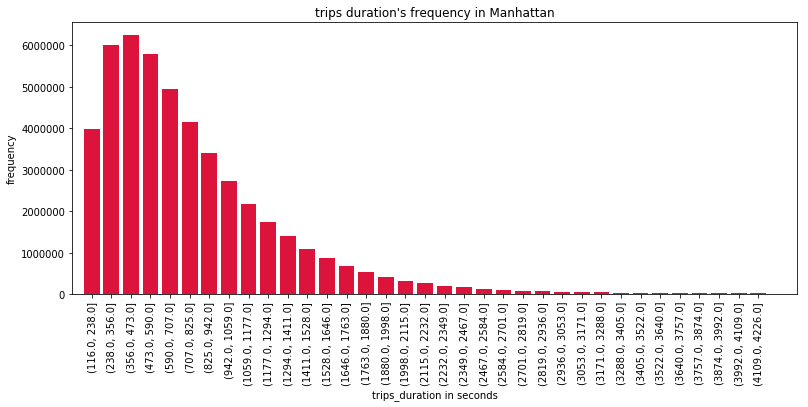

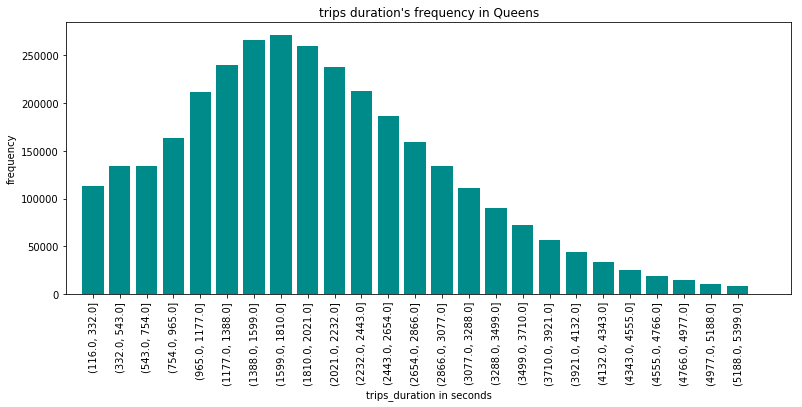

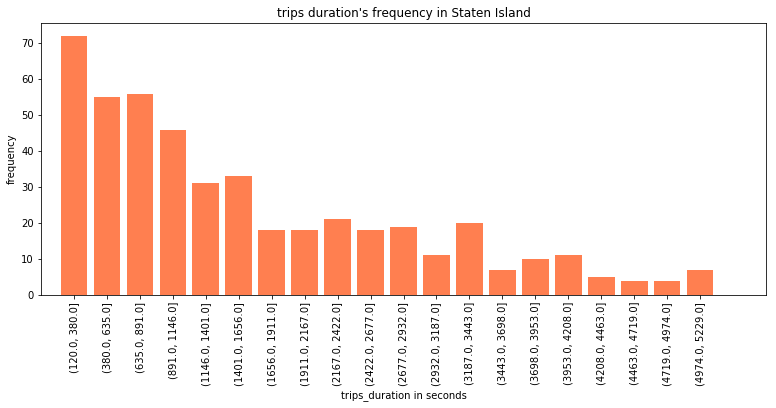

In [24]:
functions.Boroughs_durations_freq(df, borough_lst)

____

____
# [RQ4] What is the most common way of payments? 
#### The number of payments for any possible means

In [28]:
df,payment_type_lst=functions.payments_per_borough(df_names,taxi_zone_lookup,borough_lst)

In [29]:
payment_type_all=list(map(int,df.sum().values))
for ind in range(len(payment_type_lst)-len(df.columns)):
        payment_type_all.append(0)

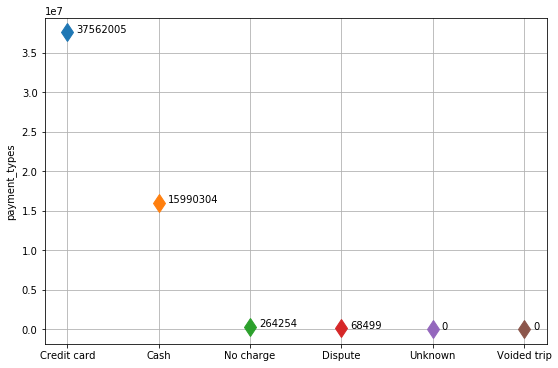

In [30]:
functions.payment_types_NYC_plot(payment_type_all,payment_type_lst)

When comparing all the boroughs (whole NYC) it can be concluded that the most of the people paid their taxi rides with credit cards, then on the second place cash was one of the most used means of paying after credit card. In addition, there weren't any observations identified as an "Unknown" or "Voided trip".

### Chi-squared test

In [31]:
%%latex
\[H_0\text {={"The method of payment is NOT correlated to the borough"}}\]
\[H_1\text {={"The method of payment is correlated to the borough"}}\]

<IPython.core.display.Latex object>

In [39]:
chi2, p_value, dof, expected = chi2_contingency(df)

In [40]:
p_value

0.0

**p_value is smaller than 0.01**. Therefore, Null hypothesis can be rejected. 
And we can conclude that =>{"The method of payment is correlated to the borough"}. In other word there is a statistically significant correlation between method of payment and borough.

### Analyzing the way of payment for each borough

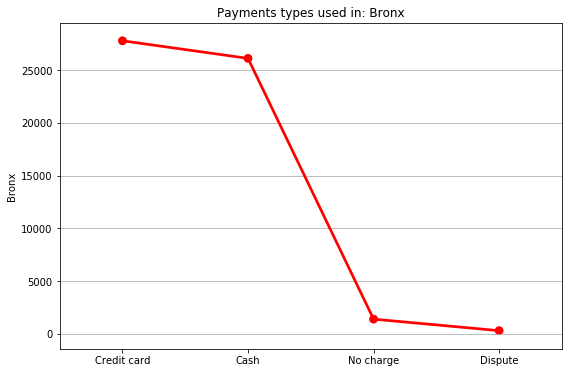

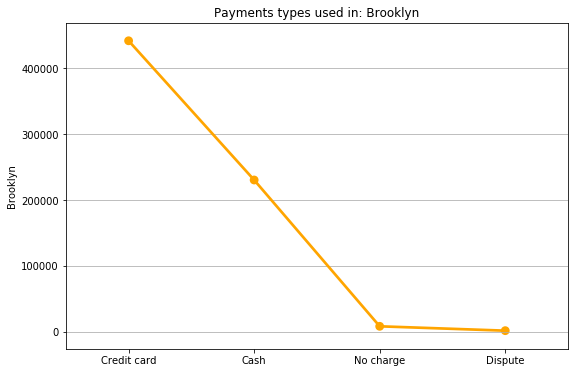

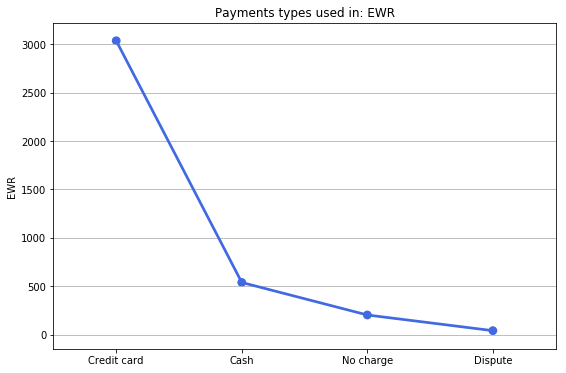

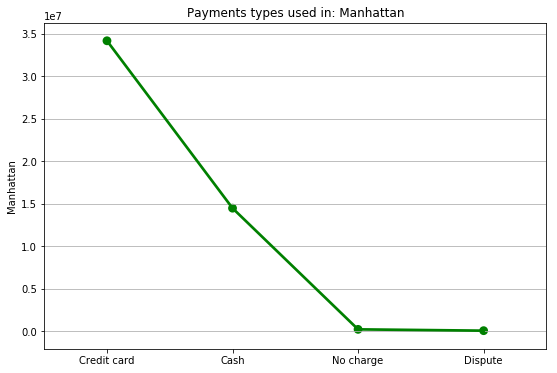

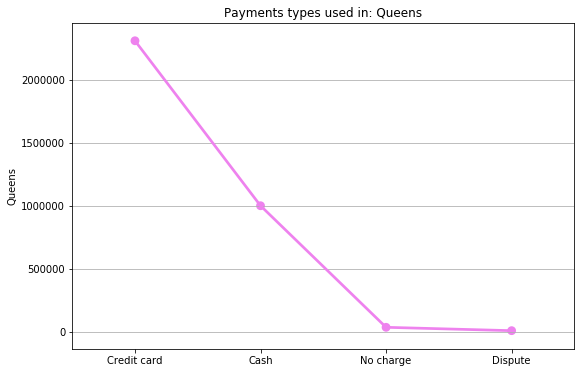

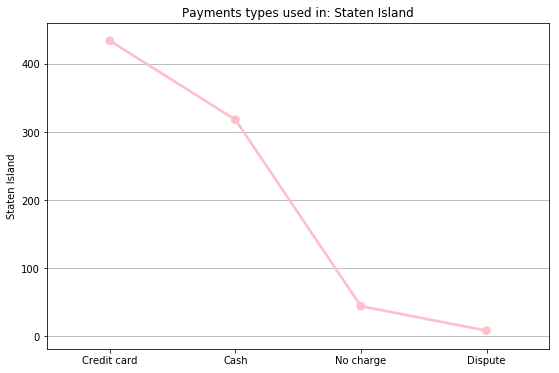

In [46]:
functions.payment_type_per_borough_plot(df,payment_type_lst)

When comparing methods of payments in each of the boroughs among each other based on the graphs it can be concluded:

That just like in the whole City, the most common mean of payment was the credit card, followed by cash.
The rides that ended with dispute were rare in all boroughs, as well as the ones that ended with no charge.
___

____
# [RQ5] Does a long distance correlate with the duration of the trip on average?

To analyze this point we first decide to filter our dataset taking under account two parameters:
- For trip_duration we took only those values higher than 120 seconds and lowest than 2 hours
- For trip_distance we select all values between 1.2 miles and 50 miles

In [50]:
df = functions.duration_distance_df(df_names)

### The dependence between distance and duration of the trip

In [51]:
df.corr()

,trip_duration,trip_distance
trip_duration,1.000000,0.767718
trip_distance,0.767718,1.000000


In [52]:
# sampling 1000 rows
temp = df.sample(1000)

In [53]:
temp.corr()

,trip_duration,trip_distance
trip_duration,1.000000,0.738775
trip_distance,0.738775,1.000000


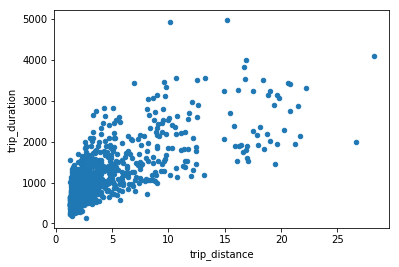

In [54]:
# plotting the sample
temp.plot(y='trip_duration', x = 'trip_distance', kind = 'scatter')

In [55]:
corr, p_value = pearsonr(temp['trip_duration'],temp['trip_distance'])
print('corr: %0.3f' %corr, "p_value:", p_value)

corr: 0.739 p_value: 3.1983555910754348e-173


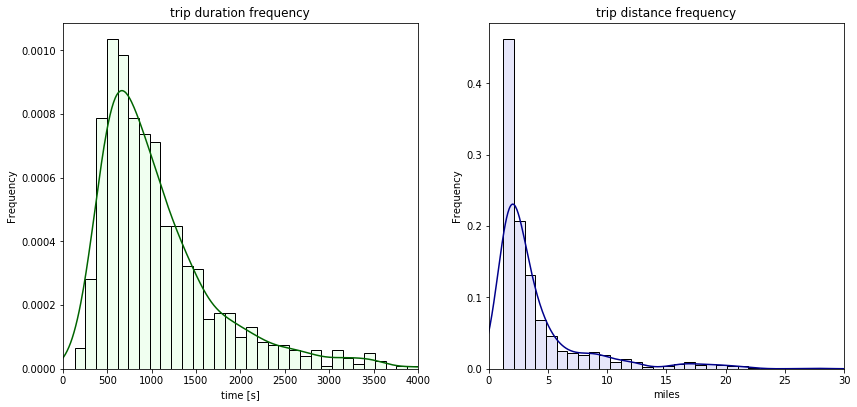

In [56]:
functions.plot_duration_distance_freq(temp)

We get a good correlation value both for the entire data set and for the subsampling data set used to plot and calculate the frequencies.

____
# [CRQ1]: Does the fare for mile change across NY's borough?

### a) Price per mile computation

We need to compute a new attribute **price_per_mile** dividing *fare_amount* by *trip_distance*.
As we did in the previous RQ we first decide to filter our dataset taking under account two parameters that drastically could influence our analysis due to many outliers in both directions. Basically we filtered considering *trip_duration* and *price_per_mile*:

    - trip_duration : we took in consider as 'valid' trips those values bounded by 120 and 5400 seconds (1 hour and half)
    
    - price_per_mile : for these values, since we saw its distribution during a preliminar analysis and we notice that its end tail attest around 14 $/mile, we considered as reasonable the values between 1.2 and 30 miles.

We have to notice that in this part we saw some odd values. For example borough such as **EWR** or **Staten Island** 
contain a lot of outliers and moreover (expecially after the filitering operations) they have a very small sample compared with other borough. This thing as we'll see in the part (**c**) of this core question will affect some results.


In [2]:
# loading the dataframe with two attributes: 
df = functions.make_df_price_per_mile(df_names, taxi_zone_lookup)

In [58]:
# making a boro_dict with all borought in a dataframe
boro_dict = functions.make_boro_dict(df,borough_lst)

### b) Mean and the standard deviation computation

In [59]:
# mean and std table for each borough
mean_std_table = functions.mean_std_table(boro_dict,borough_lst, 'price_per_mile')
mean_std_table

,Borough,Mean,Std
0,Bronx,4.840,2.081
1,Brooklyn,4.985,1.902
2,EWR,4.418,2.977
3,Manhattan,6.085,2.326
4,Queens,3.471,1.360
5,Staten Island,4.260,2.655


As we can see in the table above there is a variation on average for fare per mile. **Manhattan** spot out as the expensiest borough with a mean of 6$ per mile. From the other hand **Queens** result to be the cheapest one.
Above we plot the distribution of price per mile for each borough that better rappresent the variations.

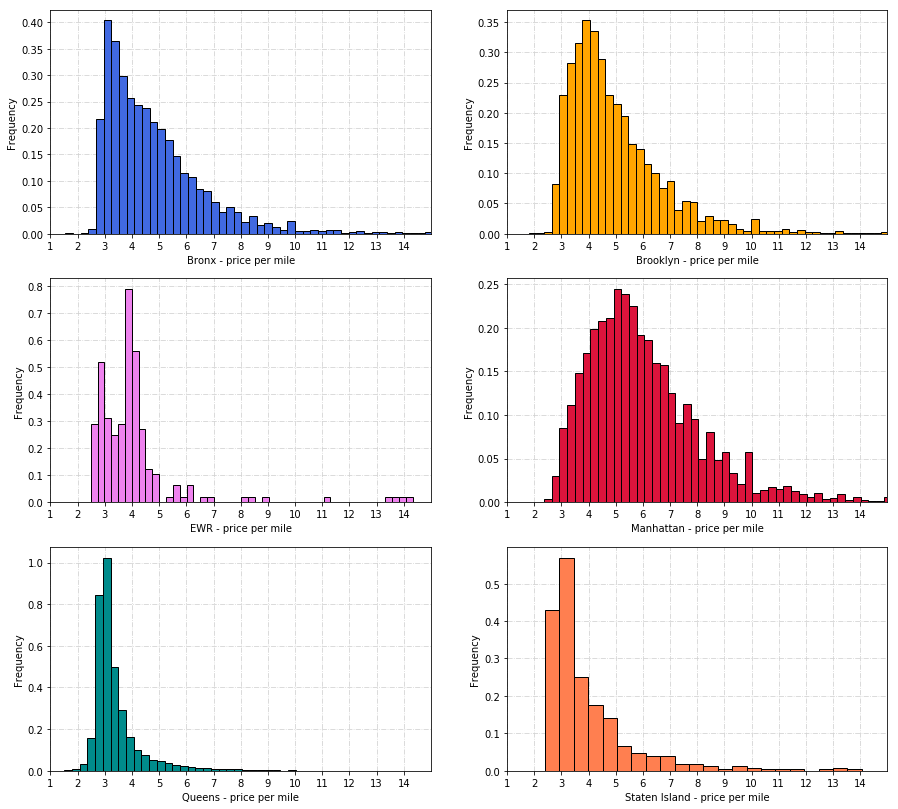

In [60]:
# plot shows the price_per_mile for each borough
functions.plot_price_per_mile(boro_dict,borough_lst)

### c) The t-test among all the possible pairs of distribution of different boroughs

- **H0 : mean of the independent sample are equal**
- **H1: mean of the independent sample are different**

In [73]:
#p value table for price_per_mile
functions.p_value_table(boro_dict, borough_lst, 'price_per_mile')

,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island
Bronx,1,0,0.005,0,0,0
Brooklyn,0,1,0,0,0,0
EWR,0.005,0,1,0,0,0.51
Manhattan,0,0,0,1,0,0
Queens,0,0,0,0,1,0
Staten Island,0,0,0.51,0,0,1


## Mitigating the traffic effect on price per mile
### P' = P/T

In [74]:
# Create a new colum P1 = P/T
df['p1'] = df['price_per_mile'] / df['trip_duration']

In [75]:
# reload borough
boro_dict = functions.make_boro_dict(df, borough_lst)

In [76]:
#mean and std
functions.mean_std_table(boro_dict,borough_lst, 'p1')

,Borough,Mean,Std
0,Bronx,0.009,0.012
1,Brooklyn,0.010,0.012
2,EWR,0.007,0.016
3,Manhattan,0.013,0.013
4,Queens,0.003,0.007
5,Staten Island,0.007,0.010


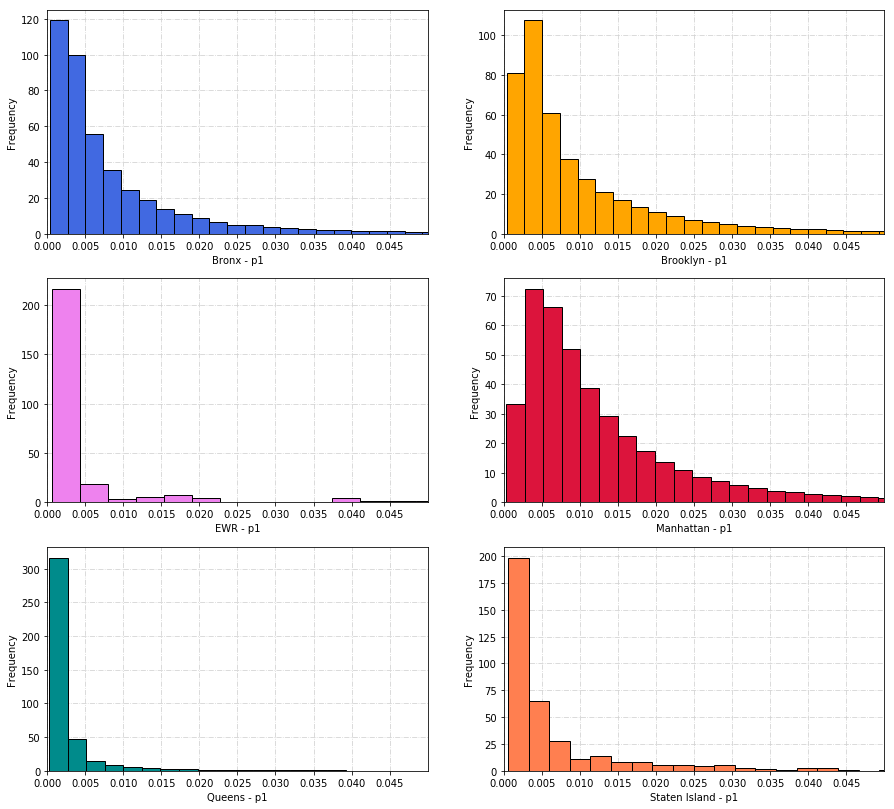

In [78]:
#plot p1 for each borough
functions.plot_p1 (boro_dict, borough_lst)

In [79]:
# make p_value_table 
functions.p_value_table(boro_dict,borough_lst,'p1')

,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island
Bronx,1,0,0.007,0,0,0
Brooklyn,0,1,0,0,0,0
EWR,0.007,0,1,0,0,0.826
Manhattan,0,0,0,1,0,0
Queens,0,0,0,0,1,0
Staten Island,0,0,0.826,0,0,1


____
# [CRQ2]: Visualize Taxis movements! 

With this function we are able to store into a list the two maps, starts map and ends map respectively.
Since is not possible to show them in this markdown, we post the link to the git repository:

    - starts map: https://github.com/dusicastepic/ADMSecondHomework/blob/master/map_ends.html
    - ends map: https://github.com/dusicastepic/ADMSecondHomework/blob/master/map_starts.html

In [ ]:
list_map=functions.pickup_and_dropoff_maps(df_names, taxi_zone_lookup, 'taxi_zones.json')

In [ ]:
list_map[0]

In [ ]:
list_map[1]

In [ ]:
# Example of saving map using os mod, do not run
maps[0].save(os.path.join('results', '/Users/...folderpath.../starts_map.html'))
maps[1].save(os.path.join('results', '/Users/...folderpath.../ends_map.html'))

Based on the previous results and the exploratory analysis of the dataset it is obvious that Manhattan has more trips than other boroughs.

There are more starting and ending points in the zones **Manhattan** is consisted of than all the other New York city zones. (which is shown on the maps)

The most popular starting and ending zones are in Manhattan, especially around the famous part of it - Upper East side, or more precisely in the streets **5th Avenue** next to **Central Park**, but also a high pickup and dropoff density is noticed in the zone where **Grand Central Terminal** train station is located.

Additionally, markers are added to the map for the airports ('*LaGuardia Airport*' and '*John F. Kennedy International Airport'*) so the airport zones can be easily distinguished from other zones. The map shows that more trips started than ended at the airports.